In [98]:
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import re 
from statsmodels.graphics.mosaicplot import mosaic
import scipy.stats as scs
%matplotlib inline

In [86]:
pd.set_option('display.max_rows', 600)
pd.set_option('display.max_columns', 2000)
pd.set_option('display.width', 300)
pd.set_option('display.max_colwidth', 100)

In [87]:
df= pd.read_csv('clean_ntsb.csv',index_col=0, header=0)#,parse_dates=['Event Date'])# , parse_dates=['Event Date'])
df['Date']= pd.to_datetime(df['Date'])

In [88]:
df.head()

,Id,Investigation,Date,Location,Country,Damage,Make,Model,EnginesNo,EngineType,Carrier,Weather,Phase,GeoPoint,Make_Model,Year
0,20150818X00406,Incident,2015-08-17,"Page, AZ",United States,Minor,QUEST,KODIAC 100,1,Turbo Prop,ARROW WEST AVIATION (DBA: REDTAIL AVIATION),VMC,TAKEOFF,"37.024445, 111.630834",QUEST KODIAC 100,2015
1,20160827X31134,Accident,2016-08-27,"Pascagoula, FL",United States,Substantial,BOEING,737,2,Turbo Fan,Southwest Airlines,VMC,OTHER,Missing,BOEING 737,2016
2,20170429X35104,Accident,2017-04-28,"Amarillo, TX",United States,Destroyed,PILATUS AIRCRAFT LTD,PC 12,1,Turbo Prop,RICO AVIATION LLC,IMC,TAKEOFF,"35.196389, -101.704722",PILATUS AIRCRAFT LTD PC 12,2017
3,20180618X32836,Accident,2018-06-15,"Kotzebue, AK",United States,Substantial,CESSNA,180K,1,Reciprocating,AIRFRAME INNOVATIONS INC,VMC,TAKEOFF,"66.135, -160.2575",CESSNA 180K,2018
4,20130814X15751,Accident,2013-08-14,"Birmingham, AL",United States,Destroyed,AIRBUS,A300 - F4 622R,2,Turbo Fan,UNITED PARCEL SERVICE CO (DBA: UNITED PARCEL SERVICE CO),UNK,APPROACH,"33.563889, -86.802222",AIRBUS A300 - F4 622R,2013


In [89]:
df.shape

(2085, 16)

In [90]:
df.isnull().sum()

Id               0
Investigation    0
Date             0
Location         0
Country          0
Damage           0
Make             0
Model            0
EnginesNo        0
EngineType       0
Carrier          0
Weather          0
Phase            0
GeoPoint         0
Make_Model       0
Year             0
dtype: int64

In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2085 entries, 0 to 2084
Data columns (total 16 columns):
Id               2085 non-null object
Investigation    2085 non-null object
Date             2085 non-null datetime64[ns]
Location         2085 non-null object
Country          2085 non-null object
Damage           2085 non-null object
Make             2085 non-null object
Model            2085 non-null object
EnginesNo        2085 non-null int64
EngineType       2085 non-null object
Carrier          2085 non-null object
Weather          2085 non-null object
Phase            2085 non-null object
GeoPoint         2085 non-null object
Make_Model       2085 non-null object
Year             2085 non-null int64
dtypes: datetime64[ns](1), int64(2), object(13)
memory usage: 276.9+ KB


In [93]:
df.describe()

,EnginesNo,Year
count,2085.000000,2085.000000
mean,1.750120,2005.923741
std,0.635941,12.290605
min,1.000000,1979.000000
25%,1.000000,2006.000000
50%,2.000000,2011.000000
75%,2.000000,2014.000000
max,4.000000,2019.000000


# Under which meteorological conditions accidents occur most?

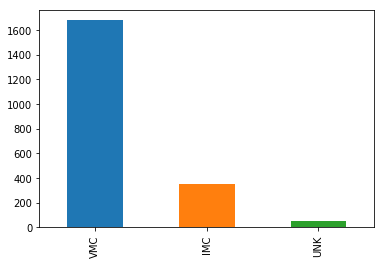

In [7]:
pd.value_counts(df['Weather']).plot.bar()

Accidents occured in Visual Meteorological Conditions more than the Instrument Meteorological Conditions. IFR flights relies on aircraft instruments. In VMC, visual references are used as primary data. Technological developments in aviation instruments can effect the accuracy of the flight under IFR conditions.

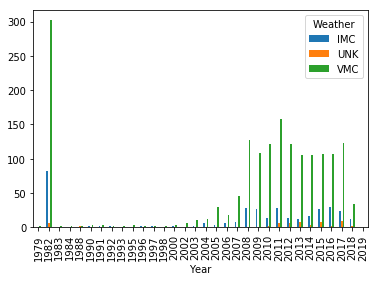

In [700]:
df.groupby(['Year','Weather']).size().unstack().plot(kind='bar')

This chart shows that IFR effect on accidents were higher tham present day.

# At which phase of flight crashes occur most?

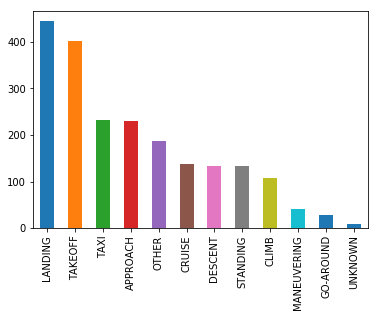

In [355]:
pd.value_counts(df['Phase']).plot.bar()

Based on the chart above landing and take-off phases of a flight are the most critical time frames.

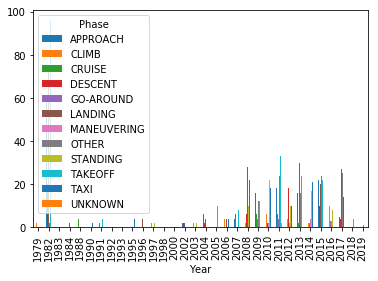

In [701]:
df.groupby(['Year','Phase']).size().unstack().plot(kind='bar')

In [ ]:
df_boeing=df[df['Make'] == 'BOEING']

df_boeing.groupby(['Year','Make']).size().unstack().plot(kind='bar')

# Which make has the highest number of accidents?

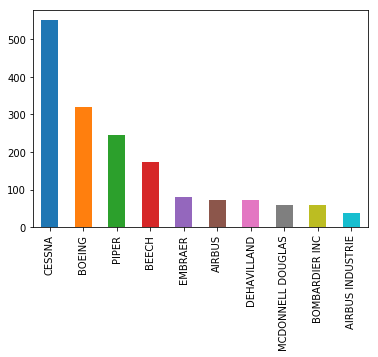

In [361]:
df['Make'].value_counts(ascending=False)[:10].plot.bar()

To be able to make a sound judgment total flights hours of each make should be taken into consideration.

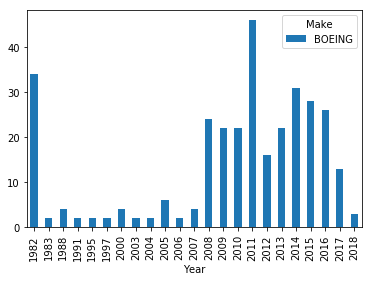

In [82]:
df_boeing=df[df['Make'] == 'BOEING']

df_boeing.groupby(['Year','Make']).size().unstack().plot(kind='bar')

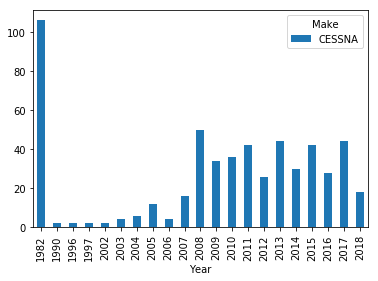

In [83]:
df_cessna=df[df['Make'] == 'CESSNA']

df_cessna.groupby(['Year','Make']).size().unstack().plot(kind='bar')

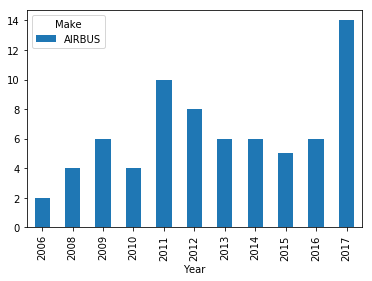

In [84]:
df_airbus=df[df['Make'] == 'AIRBUS']

df_airbus.groupby(['Year','Make']).size().unstack().plot(kind='bar')

# Which carrier has highest number of accidents?

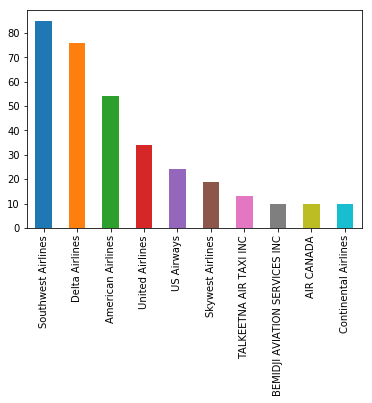

In [383]:
df['Carrier'].value_counts()[:10].plot.bar()

To be able to make a sound judgment total flights hours of each carrier should be taken into consideration.

# Which type of aircraft has highest number of accidents?

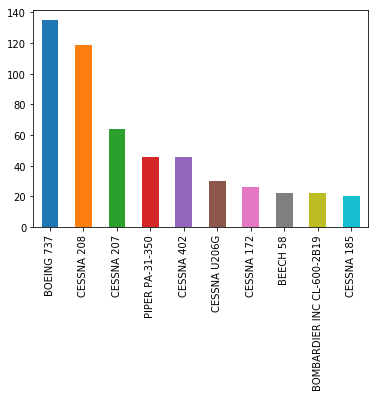

In [591]:
df.Make_Model.value_counts(ascending=False)[:10].plot.bar()

Time distribution should be observed between each accident of a same make and model.

# Is there a relation between number of engines and accidents?

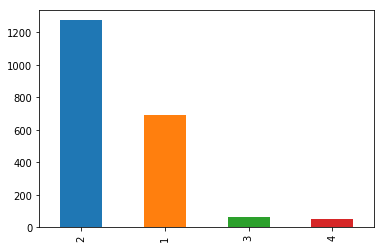

In [592]:
df['EnginesNo'].value_counts().plot.bar()

Majority of the aircrafts involved in an accident were twin engine. Total flight hours should also be considered.

# Is number of accidents decreasing over time?

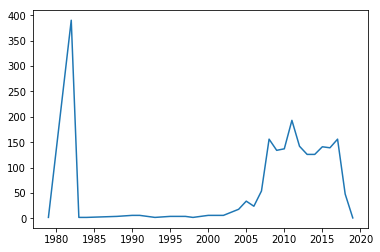

In [612]:
df['Date'].dt.year.value_counts().sort_index().plot()

Decreased number of accicent between 1982 and 2004 might be the result of applied new practises after huge number of accidents.

In [96]:
pd.crosstab(index=df['Weather'],columns=df['Investigation'])

Investigation,Accident,Incident
Weather,,
IMC,301,49
UNK,27,29
VMC,1392,287


In [192]:
#chi2_contingency(pd.crosstab(df.Weather, df.Investigation))

# The Null and Alternate Hypotheses


### H0:There is no statistically significant relationship between weather conditions and investigation type.

### Ha:There is a statistically significant relationship between weather conditions and investigation type.

#### Constructing the Contingency Table

In [342]:
contingency_table = pd.crosstab(
    
    df['Investigation'],
    df['Weather'],
    margins = True
)
contingency_table #.iloc[1:][:1]

Weather,IMC,UNK,VMC,All
Investigation,,,,
Accident,301,27,1392,1720
Incident,49,29,287,365
All,350,56,1679,2085


Each cell in this table represents a frequency count.

## Visualizing the Contingency Table with a Stacked Bar Chart

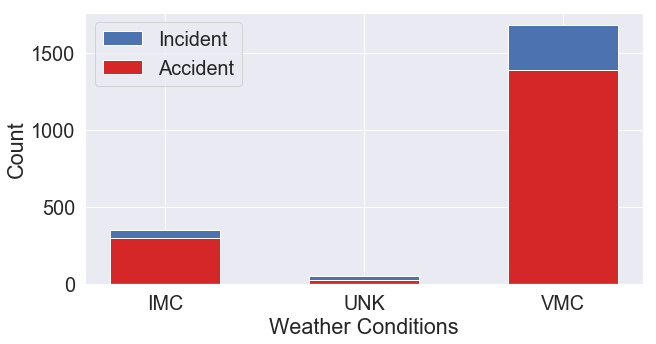

In [343]:
#Assigns the frequency values
Accident = contingency_table.iloc[0][0:3].values
Incident = contingency_table.iloc[1][0:3].values
#Plots the bar chart
fig = plt.figure(figsize=(10, 5))
sns.set(font_scale=1.8)
categories = ['IMC','UNK','VMC']

p1 = plt.bar(categories, Accident, 0.55, color='#d62728')
p2 = plt.bar(categories, Incident, 0.55,bottom=Accident)
plt.legend((p2[0], p1[0]), ('Incident','Accident'))
plt.xlabel('Weather Conditions')
plt.ylabel('Count')
plt.show()

### The Chi-Squared Test for Independence - Calculation with Numpy

In order to determine whether we accept or reject the null hypothesis. We have to compute p-value similar to the welch's t-test and ANOVA. For testing with two categorical variables, we will use the Chi-squared test.

X2=(observed−expected)**2 / (expected)

#### First, let's put the observed values into a one dimensional array, reading the contingency table from left to right then top to bottom.

In [344]:
f_obs = np.append(contingency_table.iloc[0][0:3].values, contingency_table.iloc[1][0:3].values)
f_obs

array([ 301,   27, 1392,   49,   29,  287], dtype=int64)

#### Next, we need to calculate the expected values. The expected values assume that null hypothesis is true. We would need to calculate values if there is an equal percentage of accidents and incidents for each category. For example, this is how we would calculate the expected value for the top left cell:

Expected # of Accidents in the VFR category = Total # of Accidents ∗ Number of Investigations in the VFR / total # of Investigations

In [346]:
row_sums = contingency_table.iloc[0:2,3].values
row_sums

array([1720,  365], dtype=int64)

In [347]:
col_sums = contingency_table.iloc[2,0:3].values
col_sums

array([ 350,   56, 1679], dtype=int64)

In [348]:
total = contingency_table.loc['All', 'All']

f_expected = []
for j in range(2):
    for i in col_sums:
        f_expected.append(i*row_sums[j]/total)
f_expected

[288.72901678657075,
 46.196642685851316,
 1385.074340527578,
 61.270983213429254,
 9.80335731414868,
 293.92565947242207]


#### Now that we have all our observed and expected values, we can just plug everything into the Chi-squared test formula.


In [349]:
chi_squared_statistic = ((f_obs - f_expected)**2/f_expected).sum()
print('Chi-squared Statistic: {}'.format(chi_squared_statistic))

Chi-squared Statistic: 48.7441966837712


### Degrees of Freedom

Similar to the Welch's t-test, we would have to calculate the degrees of freedom before we can determine the p-value.

DoF=(Number of rows−1)∗(Number of columns−1)

In [350]:
dof = (len(row_sums)-1)*(len(col_sums)-1)
print("Degrees of Freedom: {}".format(dof))

Degrees of Freedom: 2


#### Now we are ready to look into the Chi-squared distribution table. The cut off for a p-value of 0.05 was  5.991. Our X2 statistic was so large that the p-value is approximately zero. So we have evidence against the null hypothesis.

### The Chi-Squared Test for Independence - Using Scipy

#### All we need to do is format the observed values into a two-dimensional array and plug it into the function.

In [351]:
f_obs = np.array([contingency_table.iloc[0][0:3].values,
                  contingency_table.iloc[1][0:3].values])
f_obs

array([[ 301,   27, 1392],
       [  49,   29,  287]], dtype=int64)

In [354]:
from scipy import stats
stats.chi2_contingency(f_obs)[0:3]

(48.7441966837712, 2.602149101366033e-11, 2)

#### The results were exactly the same as our calculations with Numpy. 
The X**2 = ~49, p-value = ~0 and degrees of freedom = 2.

## Conclusions

### With a p-value < 0.05 , we can reject the null hypothesis. There is definitely some sort of relationship between Accident and the Incident column. We don't know what this relationship is, but we do know that these two variables are not independent of each other.
